# Extract Pan Card data from Images Using Tesseract 


#### Approach 1 : Grey Scale Mode + Orientation + Resize  

Using tesseract-base-engine , Without much of image pre-processing I ve opened an image in grey scale mode, resized them, checked for orientation and passed them to pytesseract base-engine.

The results after processing __687__ pan images are displayed below in piecharts , 

These pie charts shows the accuracy percentage of different fields such as pan number, date of birth,name and Father Name 


In [ ]:
from autonom8 import extract_pan as pan
pan.parse_using_tesseract()

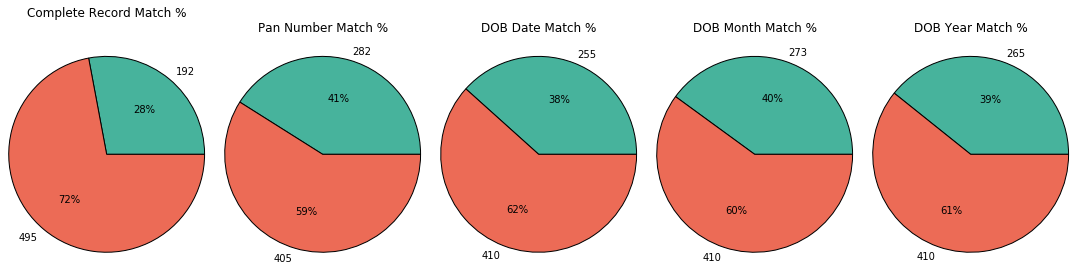

In [12]:
import matplotlib.pyplot as plt

slices_total = [pan.pytess_results['total_records']['correct'],pan.pytess_results['total_records']['incorrect'] ]
color_total = [ '#47B39C', '#EC6B56']

slices_pan = [pan.pytess_results['pan_id']['correct'],pan.pytess_results['pan_id']['incorrect'] ]
color_pan = [ '#47B39C', '#EC6B56']

slices_date = [pan.pytess_results['date']['correct'],pan.pytess_results['date']['incorrect'] ]
color_date = [ '#47B39C', '#EC6B56']

slices_month = [pan.pytess_results['month']['correct'],pan.pytess_results['month']['incorrect'] ]
color_month = [ '#47B39C', '#EC6B56']

slices_year = [pan.pytess_results['year']['correct'],pan.pytess_results['year']['incorrect'] ]
color_year = [ '#47B39C', '#EC6B56']


fig = plt.figure() 

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(slices_total, labels = slices_total, colors=color_total ,wedgeprops={'edgecolor' :'black'}, autopct='%1.0f%%', radius = 1.7)

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(slices_pan, labels = slices_pan, colors=color_pan ,wedgeprops={'edgecolor' :'black'}, autopct='%1.0f%%', radius = 1.7)

ax3 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax3.pie(slices_date, labels = slices_date, colors=color_date ,wedgeprops={'edgecolor' :'black'}, autopct='%1.0f%%', radius = 1.7)

ax4 = fig.add_axes([1.5, .0, .5, .5], aspect=1)
ax4.pie(slices_month, labels = slices_month, colors=color_date ,wedgeprops={'edgecolor' :'black'}, autopct='%1.0f%%', radius = 1.7)

ax5 = fig.add_axes([2, .0, .5, .5], aspect=1)
ax5.pie(slices_year, labels = slices_year, colors=color_date ,wedgeprops={'edgecolor' :'black'}, autopct='%1.0f%%', radius =1.7)

ax1.set_title('Complete Record Match %\n\n\n\n')
ax2.set_title('Pan Number Match %\n\n\n')
ax3.set_title('DOB Date Match %\n\n\n')
ax4.set_title('DOB Month Match %\n\n\n')
ax5.set_title('DOB Year Match %\n\n\n')

plt.show()

### Approach 2 : Brightness / Contrast Enchancement   +  Orientation  +  Skew Correction 


Increase the brightness of an image and adjust contrast, rotate an image if its orientation is wrong and then set up Gausian Thresholding 
'

Skewed images directly impact the line segmentation of OCR engine which reduces its accuracy. 
